In [ ]:
!pip install mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne #library untuk pemrosesan sinyal elektroensefalografi (EEG)

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


Extracting EDF parameters from /content/drive/MyDrive/TA/EDF/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-20b742dffc8a>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data81 = mne.io.read_raw_edf(file81)


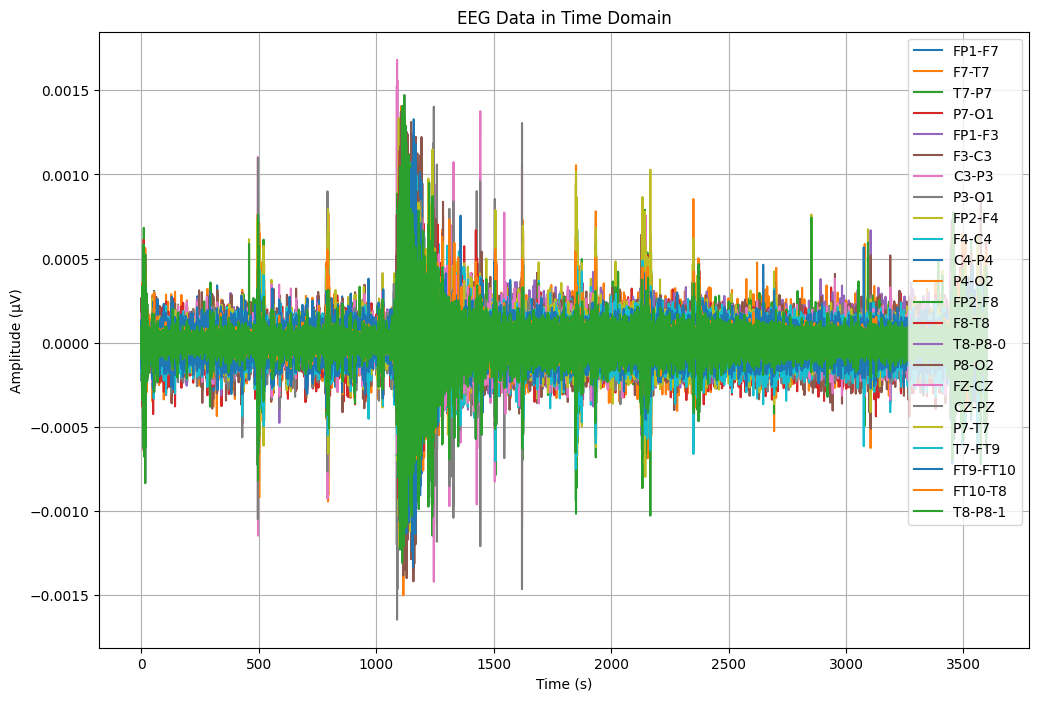

In [ ]:
# loading data
file81 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"
data81 = mne.io.read_raw_edf(file81)
data81

data, times = data81.get_data(return_times=True)
channel_names = data81.ch_names

df81 = pd.DataFrame(data.T, columns=channel_names)
df81['Time'] = times
df81.head()

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df81['Time']

# Plot raw EEG data
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df81[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

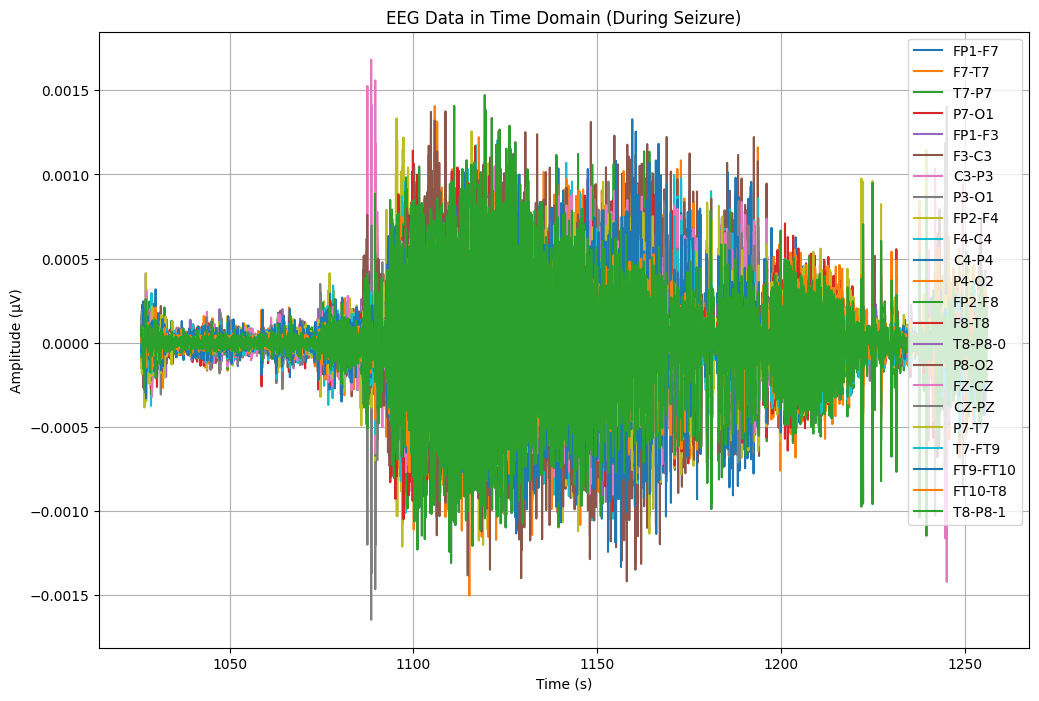

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/chb05_13.csv


In [ ]:
# potong data
sample_rate = 256

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 1026
end_time_seconds = 1256

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_81 = df81.iloc[start_index:end_index]

# Mengambil data waktu dari kolom 'Time'
time = df_81['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_81.columns:
        plt.plot(time, df_81[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Menyimpan data yang sudah di potong
csv_file = "/content/drive/MyDrive/TA/SAMPEL/chb05_13.csv"
df_8.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

In [ ]:
# labeling data
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 1086:
        return "tidak kejang"
    elif 1086 <= row['Time'] < 1196:
        return "kejang"
    else:
        return "tidak kejang"

df_81['seizure'] = df_81.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
labeled_csv_file = "/content/drive/MyDrive/TA/LABEL/chb05_13.csv"
df_81.to_csv(labeled_csv_file, index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {labeled_csv_file}")


<ipython-input-7-579650d2d841>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_81['seizure'] = df_81.apply(label_seizure, axis=1)


Data yang sudah diberi label berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/labeled_chb05_13.csv


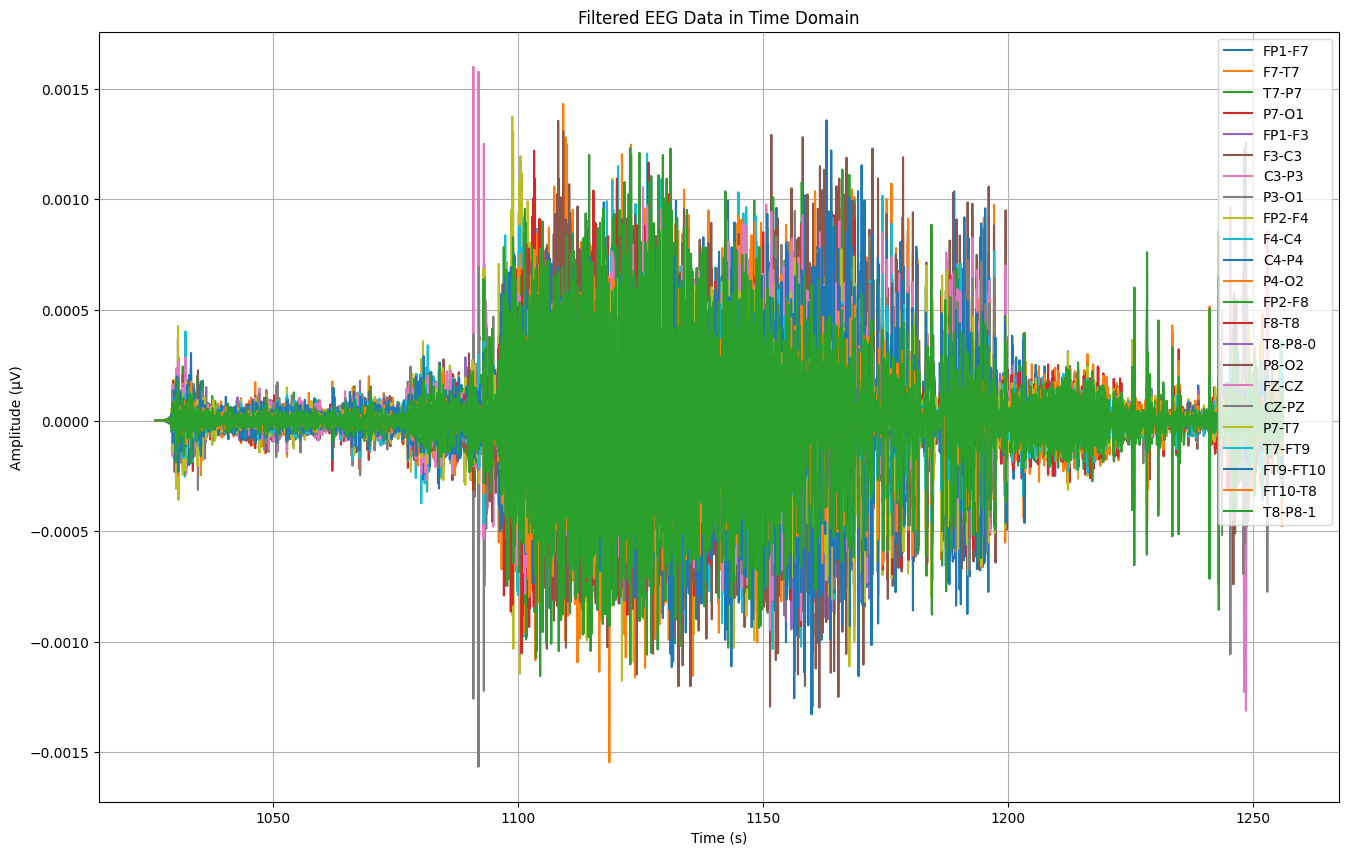

Data setelah filtering berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/SAMPEL/filtered_chb05_13.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/LABEL/chb05_13.csv")
df_81.head()

# Filter data
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

# Misalnya, df_81 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_81.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_81[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA81 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA81['Time'] = df_81['Time'].values
TA81['seizure'] = df_81['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA81.columns:
        plt.plot(TA81['Time'], TA81[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
output_file = "/content/drive/MyDrive/TA/FILTERING/chb05_13.csv"
TA81.to_csv(output_file, index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {output_file}")


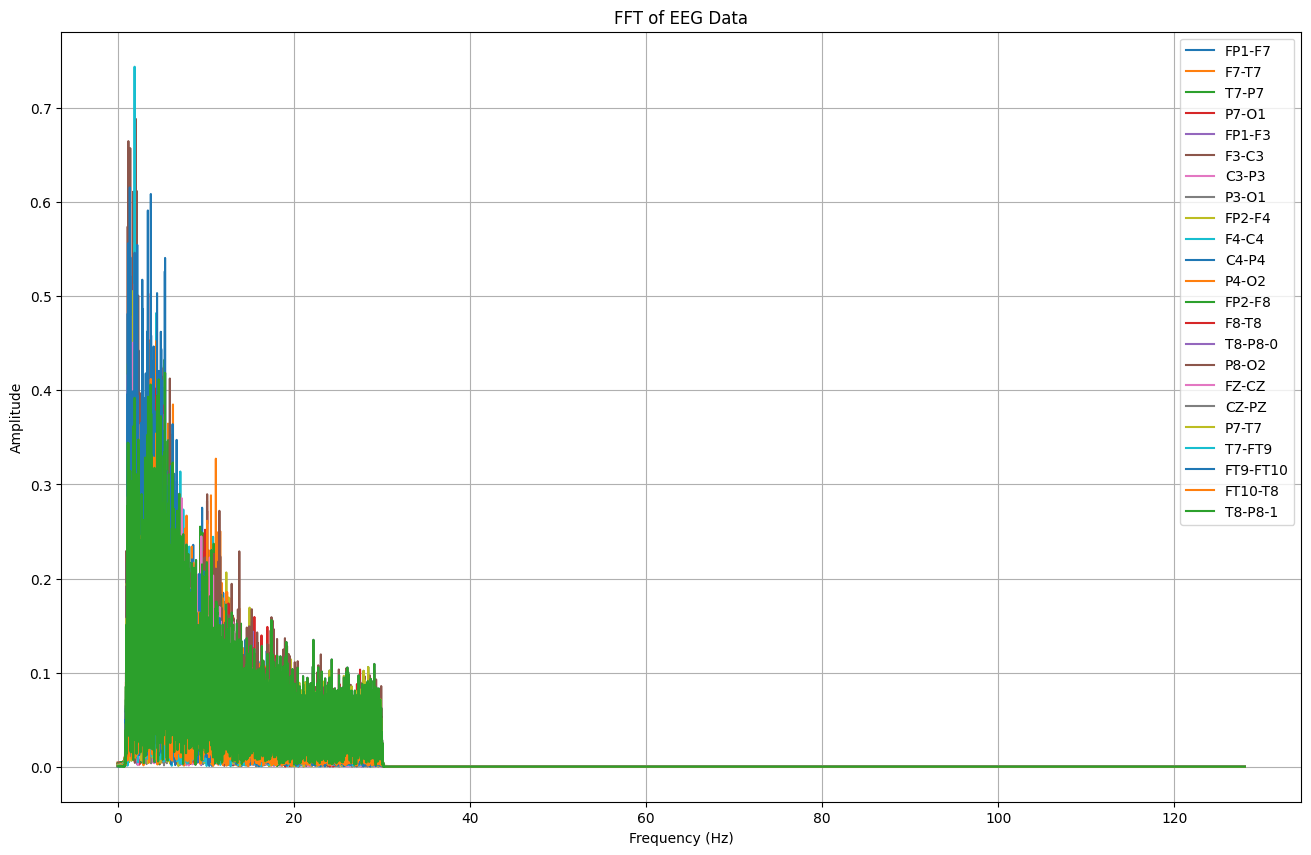

Data setelah FFT berhasil disimpan dalam file CSV:          FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0      0.002893  0.003984  0.002160  0.004463  0.002005  0.002934  0.001629   
1      0.002875  0.003964  0.002148  0.004481  0.001991  0.002918  0.001612   
2      0.002884  0.003948  0.002150  0.004483  0.002000  0.002913  0.001605   
3      0.002902  0.003949  0.002136  0.004479  0.002005  0.002912  0.001621   
4      0.002888  0.003970  0.002147  0.004470  0.002003  0.002922  0.001596   
...         ...       ...       ...       ...       ...       ...       ...   
29435  0.000004  0.000014  0.000061  0.000034  0.000059  0.000016  0.000032   
29436  0.000004  0.000014  0.000061  0.000034  0.000059  0.000016  0.000032   
29437  0.000004  0.000015  0.000061  0.000034  0.000059  0.000016  0.000032   
29438  0.000004  0.000015  0.000061  0.000034  0.000059  0.000016  0.000032   
29439  0.000004  0.000014  0.000061  0.000034  0.000059  0.000016  0.000032   



In [ ]:
# FFT
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA81.columns:
        signal = TA81[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_81 = pd.DataFrame(fft_features).T
TA_81.columns = channels
TA_81['Time'] = TA81['Time']
TA_81['seizure'] = TA81['seizure']

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_81.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA81[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
FFT_TA_81 = "/content/drive/MyDrive/TA/SAMPEL/FFT/chb05_13.csv"
TA_81.to_csv(FFT_TA_81, index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_81}")

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file into a pandas DataFrame
TA_81 = pd.read_csv("/content/drive/MyDrive/TA/SAMPEL/FFT/chb05_13.csv")

# Siapkan data untuk klasifikasi
X = TA_81.drop(['Time', 'seizure'], axis=1)
y = TA_81['seizure']

# Membagi data menjadi data pelatihan dan data pengujian secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Klasifikasi dengan Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9998301630434783
Laporan Klasifikasi:
               precision    recall  f1-score   support

      kejang       1.00      1.00      1.00      2816
tidak kejang       1.00      1.00      1.00      3072

    accuracy                           1.00      5888
   macro avg       1.00      1.00      1.00      5888
weighted avg       1.00      1.00      1.00      5888



1. START
2. Import library
3. Load data EEG dari file EDF
4. Ekstrak data dan simpan ke DataFrame pandas
5. Plot data EEG mentah
6. Tentukan rentang waktu analisis
7. Potong data berdasarkan waktu -> Simpan ke CSV
8. Tambahkan label kejang/tidak kejang -> Simpan ke CSV
9. Terapkan bandpass filter -> Simpan data hasil filter ke CSV
10. Hitung FFT data EEG -> Simpan hasil ke CSV
11. Siapkan data untuk klasifikasi
12. Bagi data menjadi latih dan uji
13. Latih model Random Forest
14. Evaluasi model -> Cetak akurasi dan laporan
15. END


In [ ]:
#3. Load data EEG dari file EDF
data1 = "/content/drive/MyDrive/TA/EDF/chb01_03 (1).edf"
data1 = mne.io.read_raw_edf(data1)
data1

data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

#4. Ekstrak data dan simpan ke DataFrame pandas
df1 = pd.DataFrame(data.T, columns=channel_names)
df1['Time'] = times

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df1['Time']

# # Step 5: Plot data EEG mentah
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# potong data
sample_rate = 256

# Step 6: Tentukan rentang waktu analisis
start_time_seconds = 2876
end_time_seconds = 3156

# Step 7: Potong data berdasarkan waktu -> Simpan ke CSV
start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_1 = df1.iloc[start_index:end_index]

# Mengambil data waktu dari kolom 'Time'
time = df_1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_1.columns:
        plt.plot(time, df_1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Menyimpan data yang sudah di potong
df_1.to_csv("/content/drive/MyDrive/TA/SAMPEL/chb01_03.csv", index=False)

print(f"Data berhasil disimpan dalam file CSV: {df_1}")

# Step 8: Tambahkan label kejang/tidak kejang -> Simpan ke CSV
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 2876:
        return "tidak kejang"
    elif 2876 <= row['Time'] < 3156:
        return "kejang"
    else:
        return "tidak kejang"

df_1['seizure'] = df_1.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
df_1.to_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv", index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {df_1}")

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/chb01_03.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['Time'] = TA1['Time']
TA_1['seizure'] = TA1['seizure']

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file into a pandas DataFrame
TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv")

# Step 11: Siapkan data untuk klasifikasi
X = TA_1.drop(['Time', 'seizure'], axis=1)
y = TA_1['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-82941e84ae61>", line 3, in <cell line: 0>
    data1 = mne.io.read_raw_edf(data1)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.import_module(submod_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690

ini untuk filter

In [ ]:
import numpy as np
from scipy.signal import firwin

# Parameter filter
fs = 256  # Frekuensi sampling (Hz)
f1 = 1 - 0.5 * 0.5  # Frekuensi cut-off rendah, dikoreksi dengan transition band
f2 = 30 + 0.5 * 0.5  # Frekuensi cut-off tinggi, dikoreksi dengan transition band
lowcut = f1 / fs  # Frekuensi rendah ternormalisasi
highcut = f2 / fs  # Frekuensi tinggi ternormalisasi
transition_band = 0.5 / fs  # Transition band ternormalisasi

# Hitung orde filter
normalized_transition_band = 3.3  # Faktor Hamming window
N = int((normalized_transition_band / transition_band) - 1)  # Orde filter
print(f"Orde filter (N): {N}")

# Desain filter bandpass menggunakan firwin
coefficients = firwin(N + 1, [lowcut, highcut], pass_zero="bandpass", window="hamming")

# Tampilkan koefisien filter
print("Koefisien filter Hamming Window:")
print(coefficients)

Orde filter (N): 1688
Koefisien filter Hamming Window:
[-5.26493400e-05 -5.84047841e-05 -6.03109993e-05 ... -6.03109993e-05
 -5.84047841e-05 -5.26493400e-05]


In [ ]:
import math

# Parameter filter
fs = 256  # Frekuensi sampling (Hz)
transition_band = 0.5  # Transition band (Hz)
window_factor = 3.3  # Faktor jendela Hamming

# Hitung transition band ternormalisasi
delta_f = transition_band / fs  # Transition band ternormalisasi

# Hitung orde filter
N = math.ceil(window_factor / delta_f) - 1
print(f"Orde filter (N): {N}")

from scipy.signal import firwin

# Frekuensi cutoff ternormalisasi
f1 = 1 - 0.5 * 0.5  # Koreksi dengan transition band
f2 = 30 + 0.5 * 0.5
lowcut = f1 / fs
highcut = f2 / fs

# Desain filter
coefficients = firwin(N + 1, [lowcut, highcut], pass_zero="bandpass", window="hamming")
print("Koefisien filter:", coefficients)


Orde filter (N): 1689
Koefisien filter: [-4.85545823e-05 -5.59694894e-05 -5.98705195e-05 ... -5.98705195e-05
 -5.59694894e-05 -4.85545823e-05]


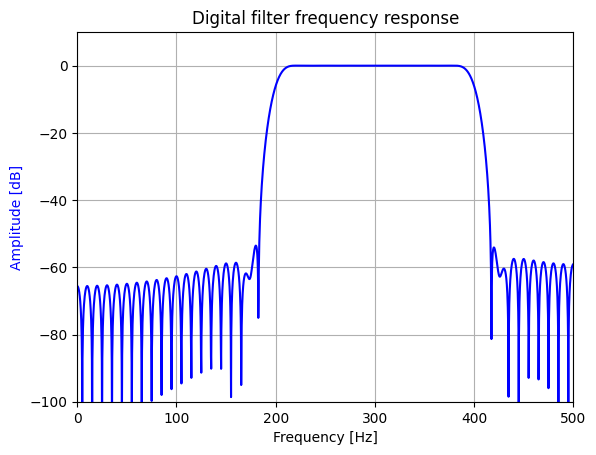

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 1000  # Sample rate, Hz
band = [200, 400]  # Desired band-pass range, Hz
trans_width = 100  # Width of transition from pass band to stop band, Hz
numtaps = 101  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

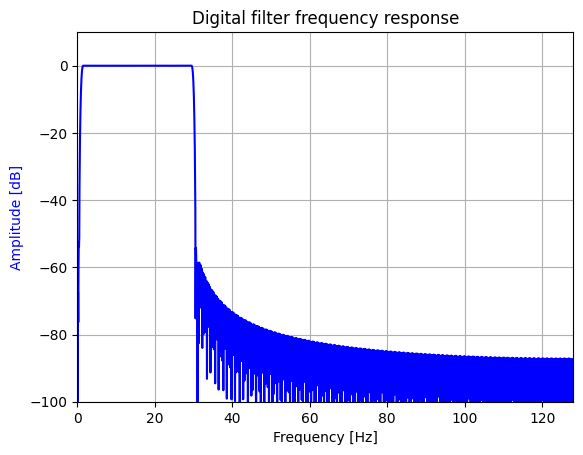

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 256  # Sample rate, Hz
band = [1, 30]  # Desired band-pass range, Hz
trans_width = 0.5  # Width of transition from pass band to stop band, Hz
numtaps = 845  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

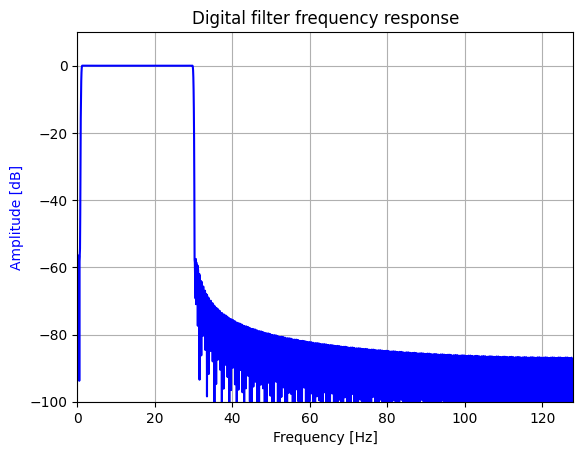

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 256  # Sample rate, Hz
band = [1, 30]  # Desired band-pass range, Hz
trans_width = 0.5  # Width of transition from pass band to stop band, Hz
numtaps = 1735  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

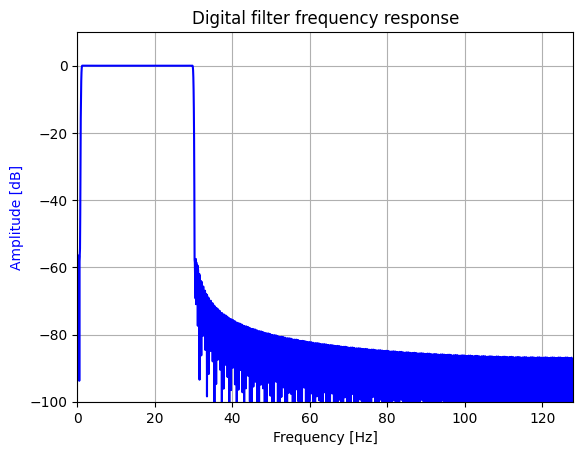

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 256  # Sample rate, Hz
band = [1, 30]  # Desired band-pass range, Hz
trans_width = 0.5  # Width of transition from pass band to stop band, Hz
numtaps = 1735  # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, band, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()

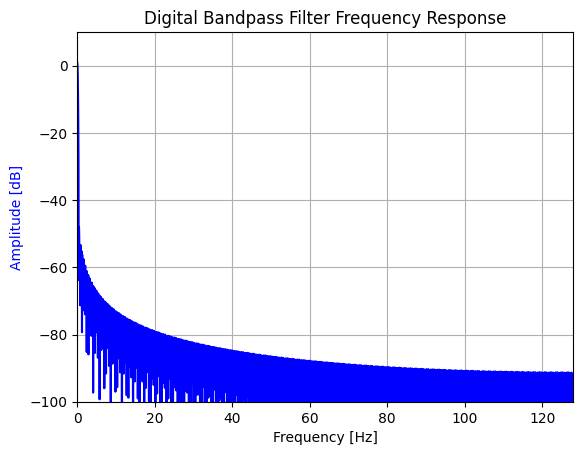

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Filter requirements
fs = 256  # Sample rate, Hz
f1 = 1    # Frekuensi cut-off rendah (Hz)
f2 = 30   # Frekuensi cut-off tinggi (Hz)
transition_band = 0.5  # Transition band (Hz)

# Normalized cut-off frequencies
lowcut = (f1 - 0.5 * transition_band) / fs
highcut = (f2 + 0.5 * transition_band) / fs

# Calculate the number of taps (filter order)
normalized_transition_band = 3.3  # Hamming window factor
transition_band_normalized = transition_band / fs
numtaps = int((normalized_transition_band / transition_band_normalized) - 1)

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps + 1, [lowcut, highcut], window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital Bandpass Filter Frequency Response')
ax1.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-100, 10])
ax1.set_xlim([0, 0.5 * fs])
ax1.grid()

plt.show()


In [ ]:
# Print the number of taps
print(f"Jumlah taps (numtaps): {numtaps + 1}")  # +1 karena numtaps sudah dihitung untuk N+1


Jumlah taps (numtaps): 1689


In [ ]:
# ini filter dari yang contoh itu
#3. Load data EEG dari file EDF
data1 = "/content/drive/MyDrive/TA/EDF/chb01_03 (1).edf"
data1 = mne.io.read_raw_edf(data1)
data1

data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

#4. Ekstrak data dan simpan ke DataFrame pandas
df1 = pd.DataFrame(data.T, columns=channel_names)
df1['Time'] = times

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df1['Time']

# # Step 5: Plot data EEG mentah
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# potong data
sample_rate = 256

# Step 6: Tentukan rentang waktu analisis
start_time_seconds = 2876
end_time_seconds = 3156

# Step 7: Potong data berdasarkan waktu -> Simpan ke CSV
start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_1 = df1.iloc[start_index:end_index]

# Mengambil data waktu dari kolom 'Time'
time = df_1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_1.columns:
        plt.plot(time, df_1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Menyimpan data yang sudah di potong
df_1.to_csv("/content/drive/MyDrive/TA/SAMPEL/chb01_03.csv", index=False)

print(f"Data berhasil disimpan dalam file CSV: {df_1}")

# Step 8: Tambahkan label kejang/tidak kejang -> Simpan ke CSV
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 2876:
        return "tidak kejang"
    elif 2876 <= row['Time'] < 3156:
        return "kejang"
    else:
        return "tidak kejang"

df_1['seizure'] = df_1.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
df_1.to_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv", index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {df_1}")

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    nyquist = 0.5 * sampling_rate
    taps = firwin(num_taps, [lowcut / nyquist, highcut / nyquist], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/chb01_03.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['Time'] = TA1['Time']
TA_1['seizure'] = TA1['seizure']

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file into a pandas DataFrame
TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv")

# Step 11: Siapkan data untuk klasifikasi
X = TA_1.drop(['Time', 'seizure'], axis=1)
y = TA_1['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-5fea29546098>", line 4, in <cell line: 0>
    data1 = mne.io.read_raw_edf(file1)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.import_module(submod_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690

In [ ]:
# ini filter dari yang contoh itu
#3. Load data EEG dari file EDF
data1 = "/content/drive/MyDrive/TA/EDF/chb01_03 (1).edf"
data1 = mne.io.read_raw_edf(data1)
data1

data, times = data1.get_data(return_times=True)
channel_names = data1.ch_names

#4. Ekstrak data dan simpan ke DataFrame pandas
df1 = pd.DataFrame(data.T, columns=channel_names)
df1['Time'] = times

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']
time = df1['Time']

# # Step 5: Plot data EEG mentah
plt.figure(figsize=(12, 8))
for channel in channels:
    plt.plot(time, df1[channel], label=channel)

plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# potong data
sample_rate = 256

# Step 6: Tentukan rentang waktu analisis
start_time_seconds = 2876
end_time_seconds = 3156

# Step 7: Potong data berdasarkan waktu -> Simpan ke CSV
start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

df_1 = df1.iloc[start_index:end_index]

# Mengambil data waktu dari kolom 'Time'
time = df_1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df_1.columns:
        plt.plot(time, df_1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Menyimpan data yang sudah di potong
df_1.to_csv("/content/drive/MyDrive/TA/SAMPEL/chb01_03.csv", index=False)

print(f"Data berhasil disimpan dalam file CSV: {df_1}")

# Step 8: Tambahkan label kejang/tidak kejang -> Simpan ke CSV
# Fungsi untuk menentukan label kejang atau tidak
def label_seizure(row):
    if row['Time'] < 2876:
        return "tidak kejang"
    elif 2876 <= row['Time'] < 3156:
        return "kejang"
    else:
        return "tidak kejang"

df_1['seizure'] = df_1.apply(label_seizure, axis=1)

# Simpan data yang sudah diberi label ke file CSV
df_1.to_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv", index=False)

print(f"Data yang sudah diberi label berhasil disimpan dalam file CSV: {df_1}")

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Import data yang sudah dikasih label
df_1 = pd.read_csv("/content/drive/MyDrive/TA/LABEL/chb01_03.csv")

# Step 9: Terapkan bandpass filter -> Simpan data hasil filter ke CSV
def bandpass_filter_fir(data, lowcut, highcut, sampling_rate, num_taps):
    taps = firwin(num_taps, [lowcut, highcut], pass_zero='bandpass', window='hamming')
    filtered_data = lfilter(taps, 1.0, data, axis=0)
    return filtered_data

lowcut_freq = 1
highcut_freq = 30
sampling_rate = 256
num_taps = 1735

# Misalnya, df_1 adalah DataFrame yang sudah ada sebelumnya
eeg_columns = df_1.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'
eeg_data = df_1[eeg_columns].values  # Data EEG

# Terapkan filter bandpass FIR pada data EEG
filtered_data = bandpass_filter_fir(eeg_data, lowcut_freq, highcut_freq, sampling_rate, num_taps)

TA1 = pd.DataFrame(filtered_data, columns=eeg_columns)
TA1['Time'] = df_1['Time'].values
TA1['seizure'] = df_1['seizure']

# Visualisasi data setelah filtering
plt.figure(figsize=(16, 10))

channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Looping untuk menampilkan data dari kanal yang dipilih
for channel in channels:
    if channel in TA1.columns:
        plt.plot(TA1['Time'], TA1[channel], label=channel)

# Menambahkan judul dan label
plt.title('Filtered EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah filtering ke file CSV
TA1.to_csv("/content/drive/MyDrive/TA/FILTERING/chb01_03.csv", index=False)

print(f"Data setelah filtering berhasil disimpan dalam file CSV: {TA1}")

# Step 10: Hitung FFT data EEG -> Simpan hasil ke CSV
# FFT dan ekstraksi fitur
def compute_fft(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]
    return fft_freqs, fft_vals

# Ekstraksi fitur FFT
fft_features = []
for channel in channels:
    if channel in TA1.columns:
        signal = TA1[channel].values
        fft_freqs, fft_vals = compute_fft(signal, sampling_rate)
        fft_features.append(fft_vals)

# Mengubah fitur FFT menjadi DataFrame
TA_1 = pd.DataFrame(fft_features).T
TA_1.columns = channels
TA_1['Time'] = TA1['Time']
TA_1['seizure'] = TA1['seizure']

# Visualisasi data setelah FFT
plt.figure(figsize=(16, 10))

# Looping untuk menampilkan spektrum frekuensi dari kanal yang dipilih
for channel in channels:
    if channel in TA_1.columns:  # Memastikan kanal ada dalam data
        fft_freqs, fft_vals = compute_fft(TA1[channel].values, sampling_rate)
        plt.plot(fft_freqs, fft_vals, label=channel)

# Menambahkan judul dan label
plt.title('FFT of EEG Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Simpan data setelah FFT ke file CSV
TA_1.to_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv", index=False)

print(f"Data setelah FFT berhasil disimpan dalam file CSV: {TA_1}")

# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the data from the CSV file into a pandas DataFrame
TA_1 = pd.read_csv("/content/drive/MyDrive/TA/FFT/chb01_03.csv")

# Step 11: Siapkan data untuk klasifikasi
X = TA_1.drop(['Time', 'seizure'], axis=1)
y = TA_1['seizure']

# Step 12: Bagi data menjadi latih dan uji secara stratified
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Step 13: Latih model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Step 14: Evaluasi model -> Cetak akurasi dan laporan
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-4b575b98fab4>", line 4, in <cell line: 0>
    data1 = mne.io.read_raw_edf(data1)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/lazy_loader/__init__.py", line 82, in __getattr__
    submod = importlib.import_module(submod_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690